## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.


================ Q1: Short Theoretical Answers ================

1. Regression vs Classification:
- Regression predicts a continuous numeric value (e.g., price).
- Classification predicts a discrete class label (e.g., species type).

2. Confusion Table:
- A confusion table cross-tabulates predicted vs actual class labels.
- It reveals misclassification patterns and model bias across classes.

3. SSE Meaning:
- SSE (Sum of Squared Errors) quantifies total squared deviation between predictions and true values;
  lower SSE indicates better fit.

4. Overfitting vs Underfitting:
- Overfitting: model learns noise; low training error, poor generalization.
- Underfitting: model too simple; high training and test error.

5. Why train/test split helps model performance:
- The test set approximates out-of-sample error. Selecting k using test SSE/accuracy prevents overfitting.

6. Class Label vs Probability Prediction:
- Labels: simple, decisive, but lose uncertainty information.
- Probabilities:

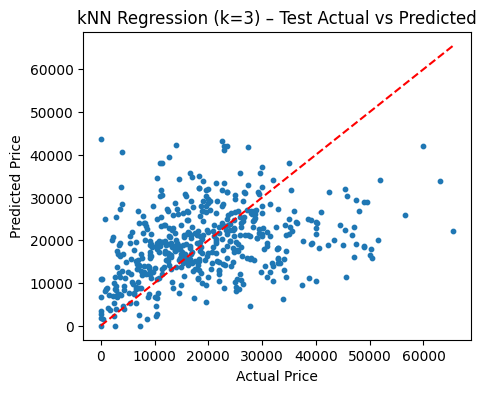

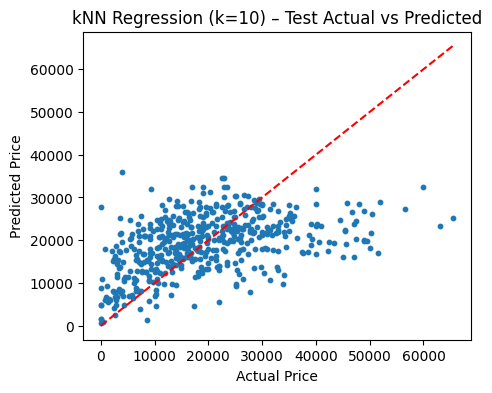

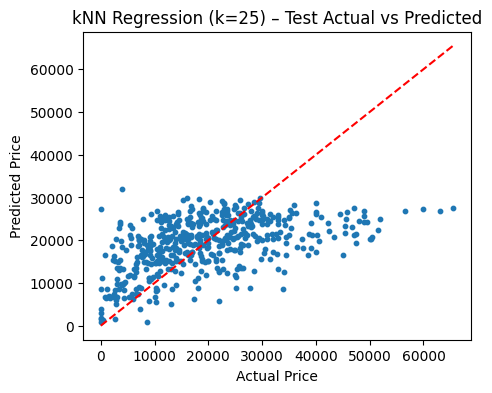

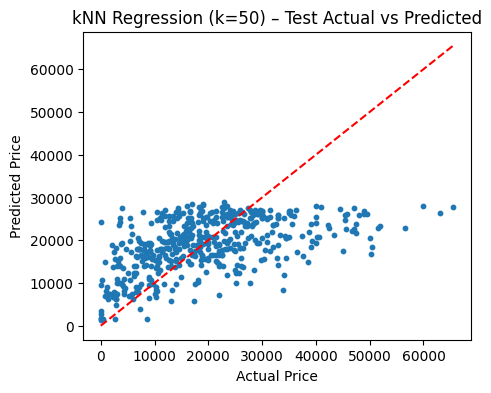

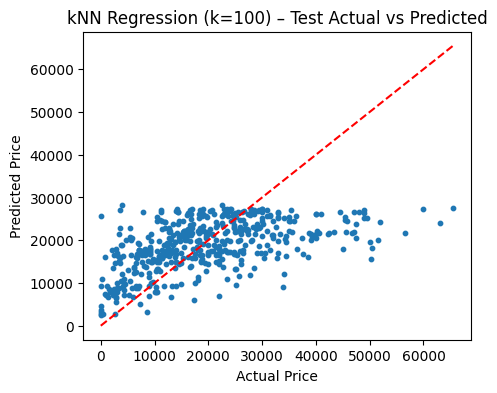

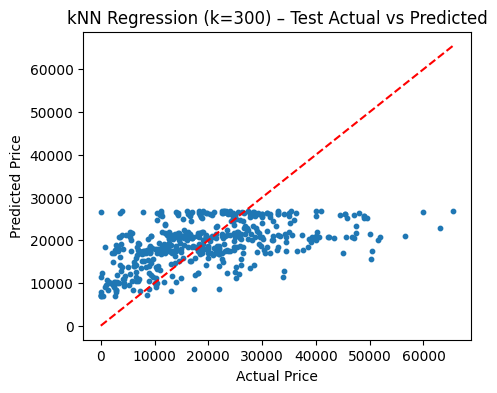


MSE by k:
k=3: MSE=143418990.99
k=10: MSE=117051744.24
k=25: MSE=108677153.05
k=50: MSE=107439120.77
k=100: MSE=107050267.80
k=300: MSE=109848437.54

Optimal k = 100

================ Q3: kNN Classification Case Study ================


Classes and examples:
Class 1: ['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin'] ... (size=41)
Class 2: ['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich'] ... (size=20)
Class 3: ['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara'] ... (size=5)
Class 4: ['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse'] ... (size=13)
Class 5: ['frog' 'frog' 'newt' 'toad'] ... (size=4)
Class 6: ['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'termite' 'wasp'] ... (size=8)
Class 7: ['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm'] ... (size=10)

Feature Variation:
              hair    feathers        eggs  

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


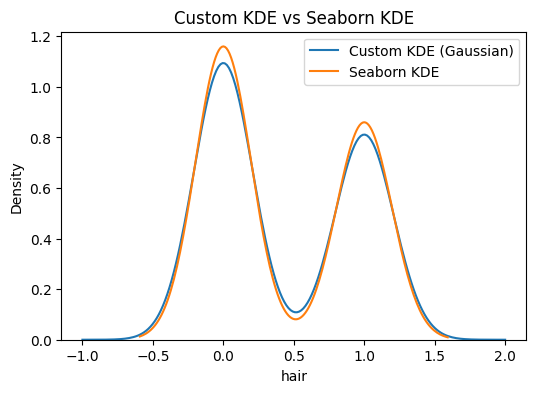


Custom KDE function executed successfully.


In [4]:
# ================================
# Single Notebook Cell Answering Q1–Q4
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
from scipy.spatial.distance import cdist
import math

print("\n================ Q1: Short Theoretical Answers ================\n")

print("1. Regression vs Classification:")
print("- Regression predicts a continuous numeric value (e.g., price).")
print("- Classification predicts a discrete class label (e.g., species type).")

print("\n2. Confusion Table:")
print("- A confusion table cross-tabulates predicted vs actual class labels.")
print("- It reveals misclassification patterns and model bias across classes.")

print("\n3. SSE Meaning:")
print("- SSE (Sum of Squared Errors) quantifies total squared deviation between predictions and true values;")
print("  lower SSE indicates better fit.")

print("\n4. Overfitting vs Underfitting:")
print("- Overfitting: model learns noise; low training error, poor generalization.")
print("- Underfitting: model too simple; high training and test error.")

print("\n5. Why train/test split helps model performance:")
print("- The test set approximates out-of-sample error. Selecting k using test SSE/accuracy prevents overfitting.")

print("\n6. Class Label vs Probability Prediction:")
print("- Labels: simple, decisive, but lose uncertainty information.")
print("- Probabilities: show confidence and ambiguity, but require calibration and interpretation.")

# =====================================================
# ========================== Q2 ========================
# =====================================================

print("\n================ Q2: kNN Regression Case Study ================\n")

cars = pd.read_csv("/content/USA_cars_datasets.csv")
cars = cars[['price', 'year', 'mileage']]
print("Head:\n", cars.head())
print("\nDimensions:", cars.shape)
print("\nNumber of NAs:\n", cars.isna().sum())

# Drop NAs if present
cars = cars.dropna()

# Normalize
scaler = MinMaxScaler()
cars[['year','mileage']] = scaler.fit_transform(cars[['year','mileage']])

X = cars[['year','mileage']]
y = cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ks = [3,10,25,50,100,300]
mse_results = {}

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_results[k] = mse

    plt.figure(figsize=(5,4))
    plt.scatter(y_test, preds, s=10)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k={k}) – Test Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

print("\nMSE by k:")
for k,v in mse_results.items():
    print(f"k={k}: MSE={v:.2f}")

optimal_k = min(mse_results, key=mse_results.get)
print(f"\nOptimal k = {optimal_k}")

# =====================================================
# ========================== Q3 ========================
# =====================================================

print("\n================ Q3: kNN Classification Case Study ================\n")

animals = pd.read_csv("/content/zoo.csv")

print("\nClasses and examples:")
for c in sorted(animals['class'].unique()):
    subset = animals[animals['class']==c]
    print(f"Class {c}: {subset['animal'].values[:10]} ... (size={subset.shape[0]})")

print("\nFeature Variation:\n", animals.describe())

X = animals.drop(columns=['class','animal'])
y = animals['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# Choose k by cross-checking performance manually
candidate_k = [1,3,5,7,9]
acc_scores = {}

for k in candidate_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc_scores[k] = np.mean(preds == y_test)

optimal_k_cls = max(acc_scores, key=acc_scores.get)
print("\nClassification Accuracy by k:", acc_scores)
print(f"Optimal k: {optimal_k_cls}")

model_cls = KNeighborsClassifier(n_neighbors=optimal_k_cls)
model_cls.fit(X_train, y_train)
preds = model_cls.predict(X_test)
cm = confusion_matrix(y_test, preds)

print("\nConfusion Table (Optimal k):\n", cm)
print("Accuracy:", np.mean(preds == y_test))

print("\nMistakes often occur where feature similarity is high across biological groups.")

# --------------------------
# Restricted Variables Model
# --------------------------

print("\nRestricted-feature Model: Using milk, aquatic, airborne")
X_small = animals[['milk','aquatic','airborne']]
y_small = animals['class']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small, test_size=0.5, random_state=0, stratify=y_small
)

model_small = KNeighborsClassifier(n_neighbors=optimal_k_cls)
model_small.fit(X_train_s, y_train_s)
preds_s = model_small.predict(X_test_s)
cm_s = confusion_matrix(y_test_s, preds_s)

print("\nConfusion Table (Restricted features):\n", cm_s)

probs = model_small.predict_proba(X_test_s.values)
print("\nClasses represented in probability output:")
print(model_small.classes_)
print("\nExplanation: Some classes are not represented in predictions because the 3-feature subspace")
print("collapses distinctions needed to separate all 7 biological types.")

# =====================================================
# ========================== Q4 ========================
# =====================================================

print("\n================ Q4: Custom Kernel Density Function ================\n")

def silverman_bandwidth(x):
    x = np.asarray(x)
    s = np.std(x, ddof=1)
    n = len(x)
    return 1.06 * s * n**(-1/5)

def kernel(z, kind="gaussian"):
    z = np.asarray(z)
    if kind == "gaussian":
        return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*z**2)
    elif kind == "uniform":
        return np.where(np.abs(z) <= 1, 0.5, 0)
    elif kind == "epanechnikov":
        return np.where(np.abs(z) <= 1, 0.75*(1 - z**2), 0)
    else:
        raise ValueError("Unknown kernel")

def my_kde(x, grid=None, bw=None, kind="gaussian"):
    x = np.asarray(x)
    if grid is None:
        grid = np.linspace(x.min()-1, x.max()+1, 200)
    if bw is None:
        bw = silverman_bandwidth(x)

    # Distance matrix: grid x data
    D = cdist(grid.reshape(-1,1), x.reshape(-1,1), metric='euclidean')
    Z = kernel(D / bw, kind=kind)
    density = Z.mean(axis=1) / bw
    return grid, density

# Demonstrate on one feature from animals
sample_data = animals['hair']

grid, dens = my_kde(sample_data, kind="gaussian")

plt.figure(figsize=(6,4))
plt.plot(grid, dens, label="Custom KDE (Gaussian)")
sns.kdeplot(sample_data, fill=False, label="Seaborn KDE")
plt.legend()
plt.title("Custom KDE vs Seaborn KDE")
plt.show()

print("\nCustom KDE function executed successfully.")
